## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Base de Dados

In [2]:
header = ['ID', 'Target', 'Radius-1', 'Texture-1', 'Perimeter-1', 'Area-1', 'Smoothness-1', 'Compactness-1', 'Concavity-1', 'Concave Points-1', 'Symmetry-1', 'Fractal Dimension-1',
         'Radius-2', 'Texture-2', 'Perimeter-2', 'Area-2', 'Smoothness-2', 'Compactness-2', 'Concavity-2', 'Concave Points-2', 'Symmetry-2', 'Fractal Dimension-2',
         'Radius-3', 'Texture-3', 'Perimeter-3', 'Area-3', 'Smoothness-3', 'Compactness-3', 'Concavity-3', 'Concave Points-3', 'Symmetry-3', 'Fractal Dimension-3']
data = pd.read_csv('wdbc.data', names=header)
data.head()

,ID,Target,Radius-1,Texture-1,Perimeter-1,Area-1,Smoothness-1,Compactness-1,Concavity-1,Concave Points-1,...,Radius-3,Texture-3,Perimeter-3,Area-3,Smoothness-3,Compactness-3,Concavity-3,Concave Points-3,Symmetry-3,Fractal Dimension-3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data['Target'] = data['Target'].map({'M': 1, 'B': 0})

## Limpeza da Base de Dados - 3 Células

In [4]:
X = data.drop(['ID', 'Target'], axis = 1)
y = data['Target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(X_train)
scale_X_test = scaler.transform(X_test)

## Métodos de Classificação - 3 Células

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_X_train = scale_X_train
lr_X_test = scale_X_test
lr_y_train = y_train
lr_y_test = y_test

for solver in solvers:
    lr = LogisticRegression(solver= solver, multi_class= 'ovr')
    lr.fit(lr_X_train, lr_y_train)
    lr_pred = lr.predict(lr_X_test)
    print ('Solver: ' + solver)
    print('Accuracy Score: {0:.3f}\n'.format(lr.score(lr_X_test, lr_y_test)))

Solver: newton-cg
Accuracy Score: 0.953

Solver: lbfgs
Accuracy Score: 0.953

Solver: liblinear
Accuracy Score: 0.959

Solver: sag
Accuracy Score: 0.953

Solver: saga
Accuracy Score: 0.959



/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
lr = LogisticRegression(solver= 'newton-cg', multi_class= 'ovr')
lr.fit(lr_X_train, lr_y_train)
lr_pred = lr.predict(lr_X_test)

print(classification_report(lr_y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       110
           1       0.95      0.92      0.93        61

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB

nbc_X_train = scale_X_train
nbc_X_test = scale_X_test
nbc_y_train = y_train
nbc_y_test = y_test

nbc = GaussianNB()
nbc.fit(nbc_X_train, nbc_y_train)
nbc_pred = nbc.predict(nbc_X_test)
print('Accuracy Score: {0:.3f}'.format(nbc.score(nbc_X_test, nbc_y_test)))

Accuracy Score: 0.942


In [10]:
print(classification_report(nbc_y_test,nbc_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       110
           1       0.96      0.87      0.91        61

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### K-Nearest Neighbors (KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_error_rate = []
knn_score = []

knn_X_train = scale_X_train
knn_X_test = scale_X_test
knn_y_train = y_train
knn_y_test = y_test

k = 0
score = 0

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(knn_X_train, knn_y_train)
    knn_pred = knn.predict(knn_X_test)
    knn_error_rate.append(np.mean(knn_pred != knn_y_test))
    knn_score.append(knn.score(knn_X_test, knn_y_test))
    if knn.score(knn_X_test, knn_y_test) > score:
        score = knn.score(knn_X_test, knn_y_test)
        k = i

Text(0, 0.5, 'Error Rate')

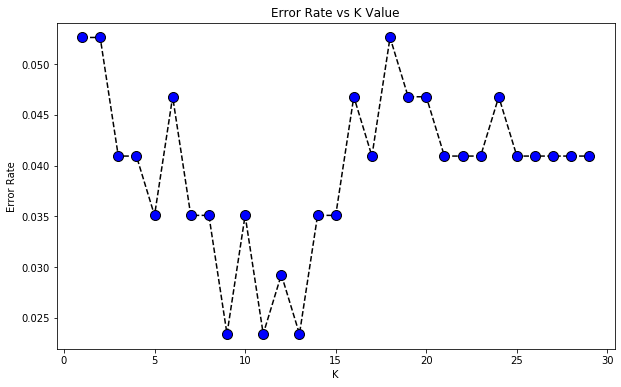

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_error_rate, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Score')

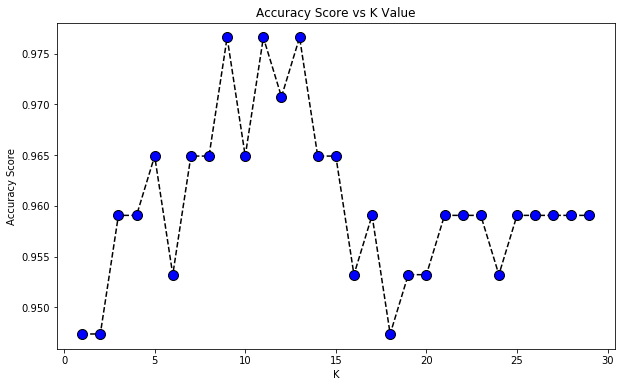

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_score, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Score vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [14]:
print('K: ' + str(k))
print('Accuracy Score: {0:.3f}\n'.format(score))

K: 9
Accuracy Score: 0.977



In [15]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

print(classification_report(knn_y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.93      0.97        61

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Support Vector Machines (SVM)

In [16]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_X_train = scale_X_train
svm_X_test = scale_X_test
svm_y_train = y_train
svm_y_test = y_test

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel, random_state = 11)
    svm.fit(svm_X_train, svm_y_train)
    svm_pred = svm.predict(svm_X_test)
    print ('Kernel: ' + kernel)
    print('Accuracy Score: {0:.3f}\n'.format(svm.score(svm_X_test, svm_y_test)))

Kernel: linear
Accuracy Score: 0.953

Kernel: poly
Accuracy Score: 0.883

Kernel: rbf
Accuracy Score: 0.965

Kernel: sigmoid
Accuracy Score: 0.942



In [17]:
svm = SVC(kernel = 'linear', random_state = 11)
svm.fit(svm_X_train, svm_y_train)
svm_pred = svm.predict(svm_X_test)

print(classification_report(svm_y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       110
           1       0.95      0.92      0.93        61

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Random Forest Classifier

In [18]:

from sklearn.ensemble import RandomForestClassifier

rfc_X_train = scale_X_train
rfc_X_test = scale_X_test
rfc_y_train = y_train
rfc_y_test = y_test

acc = 0

for i in range(1, 1000, 50):
    for j in range(1, 10):
        rfc = RandomForestClassifier(n_estimators = i, min_samples_leaf = j, random_state = 11)
        rfc.fit(rfc_X_train, rfc_y_train)
        rfc_pred = rfc.predict(rfc_X_test)
        if acc < rfc.score(rfc_X_test, rfc_y_test):
            acc = rfc.score(rfc_X_test, rfc_y_test)
            print('Number of trees: %.2f' % i)
            print('Minimum sample leaf: %.2f' % j)
            print ('Accuracy Score: %.2f\n' % acc)

Number of trees: 1.00
Minimum sample leaf: 1.00
Accuracy Score: 0.96

Number of trees: 51.00
Minimum sample leaf: 2.00
Accuracy Score: 0.98



In [19]:
rfc = RandomForestClassifier(n_estimators = 101, min_samples_leaf = 6, random_state = 11)
rfc.fit(rfc_X_train, rfc_y_train)
rfc_pred = rfc.predict(rfc_X_test)

print(classification_report(rfc_y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       110
           1       0.96      0.89      0.92        61

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



## Limpeza Dados - 2 Células

In [20]:
X = data.drop(['ID', 'Target', 'Radius-3', 'Texture-3', 'Perimeter-3', 'Area-3', 'Smoothness-3', 'Compactness-3', 'Concavity-3', 'Concave Points-3', 'Symmetry-3', 'Fractal Dimension-3'], axis = 1)
y = data['Target']

In [36]:
X.head()

,ID,Target,Radius-1,Texture-1,Perimeter-1,Area-1,Smoothness-1,Compactness-1,Concavity-1,Concave Points-1,...,Radius-2,Texture-2,Perimeter-2,Area-2,Smoothness-2,Compactness-2,Concavity-2,Concave Points-2,Symmetry-2,Fractal Dimension-2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(X_train)
scale_X_test = scaler.transform(X_test)

## Métodos de Classificação - 2 Células

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_X_train = scale_X_train
lr_X_test = scale_X_test
lr_y_train = y_train
lr_y_test = y_test

for solver in solvers:
    lr = LogisticRegression(solver= solver, multi_class= 'ovr')
    lr.fit(lr_X_train, lr_y_train)
    lr_pred = lr.predict(lr_X_test)
    print ('Solver: ' + solver)
    print('Accuracy Score: {0:.3f}\n'.format(lr.score(lr_X_test, lr_y_test)))

Solver: newton-cg
Accuracy Score: 1.000

Solver: lbfgs
Accuracy Score: 1.000

Solver: liblinear
Accuracy Score: 1.000

Solver: sag
Accuracy Score: 1.000

Solver: saga
Accuracy Score: 1.000



/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [24]:
lr = LogisticRegression(solver= 'newton-cg', multi_class= 'ovr')
lr.fit(lr_X_train, lr_y_train)
lr_pred = lr.predict(lr_X_test)

print(classification_report(lr_y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        61

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



### Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB

nbc_X_train = scale_X_train
nbc_X_test = scale_X_test
nbc_y_train = y_train
nbc_y_test = y_test

nbc = GaussianNB()
nbc.fit(nbc_X_train, nbc_y_train)
nbc_pred = nbc.predict(nbc_X_test)
print('Accuracy Score: {0:.3f}'.format(nbc.score(nbc_X_test, nbc_y_test)))

Accuracy Score: 1.000


In [26]:
print(classification_report(nbc_y_test,nbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        61

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



### K-Nearest Neighbors (KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_error_rate = []
knn_score = []

knn_X_train = scale_X_train
knn_X_test = scale_X_test
knn_y_train = y_train
knn_y_test = y_test

k = 0
score = 0

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(knn_X_train, knn_y_train)
    knn_pred = knn.predict(knn_X_test)
    knn_error_rate.append(np.mean(knn_pred != knn_y_test))
    knn_score.append(knn.score(knn_X_test, knn_y_test))
    if knn.score(knn_X_test, knn_y_test) > score:
        score = knn.score(knn_X_test, knn_y_test)
        k = i

Text(0, 0.5, 'Error Rate')

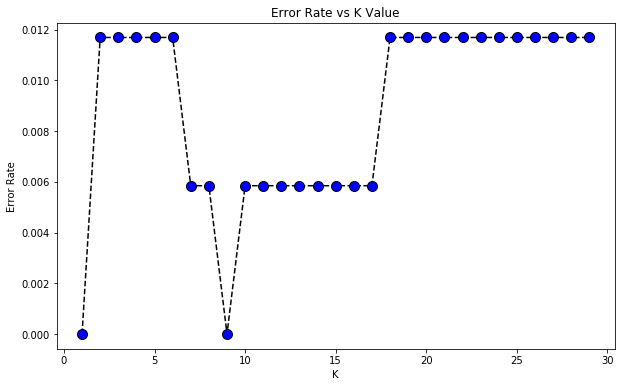

In [28]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_error_rate, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Score')

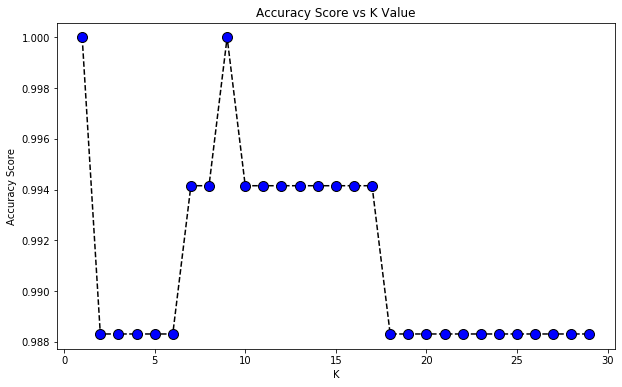

In [29]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_score, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Score vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [30]:
print('K: ' + str(k))
print('Accuracy Score: {0:.3f}\n'.format(score))

K: 1
Accuracy Score: 1.000



In [31]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

print(classification_report(knn_y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        61

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



### Support Vector Machines (SVM)

In [32]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_X_train = scale_X_train
svm_X_test = scale_X_test
svm_y_train = y_train
svm_y_test = y_test

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel, random_state = 11)
    svm.fit(svm_X_train, svm_y_train)
    svm_pred = svm.predict(svm_X_test)
    print ('Kernel: ' + kernel)
    print('Accuracy Score: {0:.3f}\n'.format(svm.score(svm_X_test, svm_y_test)))

Kernel: linear
Accuracy Score: 1.000

Kernel: poly
Accuracy Score: 0.930

Kernel: rbf
Accuracy Score: 1.000

Kernel: sigmoid
Accuracy Score: 0.994



In [33]:
svm = SVC(kernel = 'linear', random_state = 11)
svm.fit(svm_X_train, svm_y_train)
svm_pred = svm.predict(svm_X_test)

print(classification_report(svm_y_test,svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        61

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



### Random Forest Classifier

In [34]:

from sklearn.ensemble import RandomForestClassifier

rfc_X_train = scale_X_train
rfc_X_test = scale_X_test
rfc_y_train = y_train
rfc_y_test = y_test

acc = 0

for i in range(1, 1000, 50):
    for j in range(1, 10):
        rfc = RandomForestClassifier(n_estimators = i, min_samples_leaf = j, random_state = 11)
        rfc.fit(rfc_X_train, rfc_y_train)
        rfc_pred = rfc.predict(rfc_X_test)
        if acc < rfc.score(rfc_X_test, rfc_y_test):
            acc = rfc.score(rfc_X_test, rfc_y_test)
            print('Number of trees: %.2f' % i)
            print('Minimum sample leaf: %.2f' % j)
            print ('Accuracy Score: %.2f\n' % acc)

Number of trees: 1.00
Minimum sample leaf: 1.00
Accuracy Score: 1.00



In [35]:
rfc = RandomForestClassifier(n_estimators = 101, min_samples_leaf = 6, random_state = 11)
rfc.fit(rfc_X_train, rfc_y_train)
rfc_pred = rfc.predict(rfc_X_test)

print(classification_report(rfc_y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.97      0.98        61

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

